<a href="https://colab.research.google.com/github/JungyuBaeck/Jungyu-astron1221/blob/main/income_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import astropy.constants as ac #import a Python package to call the value of certain constants.
import astropy.units as u # import a Python package to call certain unit, e.g., the mass of the Sun
import numpy as np
import matplotlib.pyplot as plt

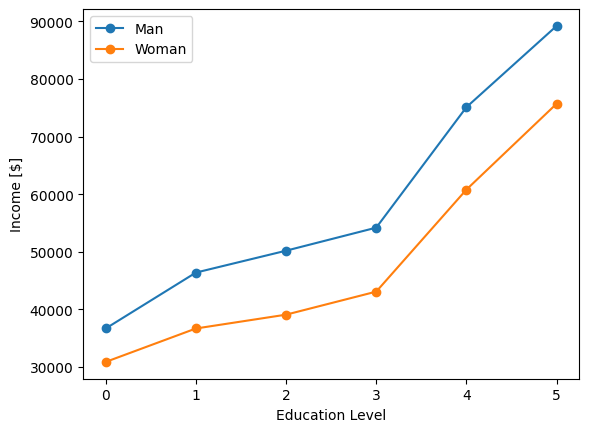

In [ ]:
# After extract the second column
# Had to remove the first one 54200 because it is for all levels.
# Income_arr = np.array([36700.,46400.,50200.,54200.,75100.,89200.])
Income_arr_man = np.array([36700.,46400.,50200.,54200.,75100.,89200.])
Income_arr_woman = np.array([30900.,36700.,39100.,43100.,60800.,75700.])
Education_arr = np.arange(len(Income_arr_man))
plt.plot(Education_arr,Income_arr_man, "o-")
plt.plot(Education_arr,Income_arr_woman, "o-")
plt.legend(["Man", "Woman"])
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.show()

In [ ]:

# Extract the first column and remove the first one entry.
Education_levels = np.array([
"Less than high school completion",
"High school completion",
"Some college, no degree",
"Associate’s degree",
"Bachelor’s degree",
"Master’s or higher degree"
])


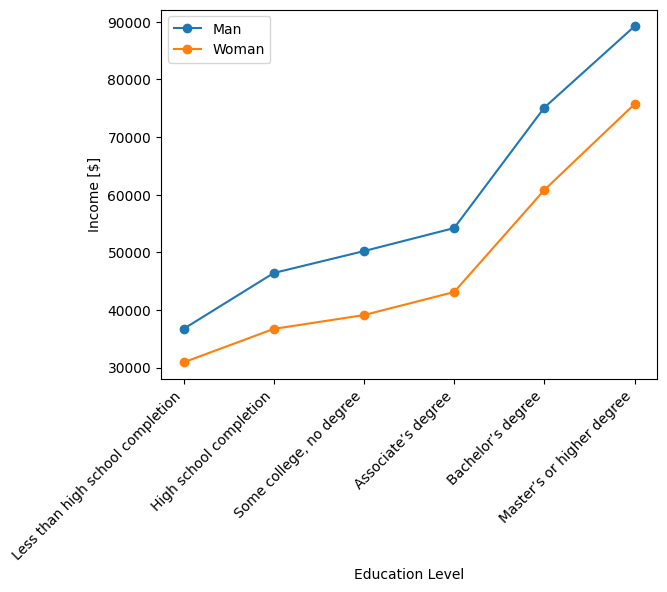

In [ ]:
# To make the figure more readable on the axis
plt.plot(Education_arr,Income_arr_man, "o-")
plt.plot(Education_arr,Income_arr_woman, "o-")
plt.legend(["Man", "Woman"])
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.xticks(Education_arr, Education_levels, rotation=45, ha="right")
plt.show()

In [ ]:
# Use polyfit to fit the data with a linear relathioship, i.e., a first-order polynomial
# More information about polyfit can be found here: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
z_linear_man = np.polyfit(Education_arr,Income_arr_man,1)
z_linear_woman = np.polyfit(Education_arr,Income_arr_woman,1)
# "income = z_linear[0] * level + z_linear[1]", where z_linear[0] represents the slope and z_linear[1] represents the y-intercept
print("Slope = ", z_linear_man[0], " in dollar per level")
print("Y-intercept = ", z_linear_man[1], " in dollar at level 0, i.e., Less than high school completion")

print("Slope = ", z_linear_woman[0], " in dollar per level")
print("Y-intercept = ", z_linear_woman[1], " in dollar at level 0, i.e., Less than high school completion")

Slope =  10074.285714285712  in dollar per level
Y-intercept =  33447.61904761905  in dollar at level 0, i.e., Less than high school completion
Slope =  8579.999999999998  in dollar per level
Y-intercept =  26266.666666666653  in dollar at level 0, i.e., Less than high school completion


In [ ]:
z_quadratic_man = np.polyfit(Education_arr,Income_arr_man,2)
print(z_quadratic_man)
print("That is: Income = {:.1f} * level**2 + {:.1f} * level + {:.1f}".format(z_quadratic_man[0], z_quadratic_man[1], z_quadratic_man[2]))

z_quadratic_woman = np.polyfit(Education_arr,Income_arr_woman,2)
print(z_quadratic_woman)
print("That is: Income = {:.1f} * level**2 + {:.1f} * level + {:.1f}".format(z_quadratic_woman[0], z_quadratic_woman[1], z_quadratic_woman[2]))
# Note the above line on the usage of {} for printing variables, and :.1f to control the printed number of siginifiant digits

[ 1614.28571429  2002.85714286 38828.57142857]
That is: Income = 1614.3 * level**2 + 2002.9 * level + 38828.6
[ 1905.35714286  -946.78571429 32617.85714286]
That is: Income = 1905.4 * level**2 + -946.8 * level + 32617.9


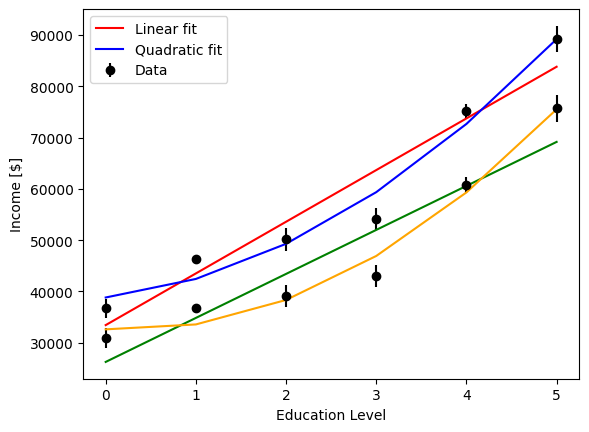

In [ ]:
# Plot the data and the two fits: linear and quadratic
# Rename some variables to be consistent with the above definition
O_man = Income_arr_man
O_err = np.array([1910, 500, 2220, 2140, 1540, 2580]) # extract from the same figure with Confidence interval toggled on, and remove the first entry
C_linear = z_linear_man[0] * Education_arr + z_linear_man[1]
C_quadratic = z_quadratic_man[0] * Education_arr**2 + z_quadratic_man[1] * Education_arr + z_quadratic_man[2]

Income_arr_man = np.array([36700.,46400.,50200.,54200.,75100.,89200.])
Education_arr = np.arange(len(Income_arr_man))
plt.errorbar(Education_arr, O_man, yerr=O_err, marker="o", linestyle = "None", color = "black", label = "Data")
plt.plot(Education_arr,C_linear, color = "red", label = "Linear fit")
plt.plot(Education_arr,C_quadratic, color = "blue", label = "Quadratic fit")

O_woman = Income_arr_woman
O_woman_err_woman = np.array([1910, 500, 2220, 2140, 1540, 2580])
C_linear = z_linear_woman[0] * Education_arr + z_linear_woman[1]
C_quadratic = z_quadratic_woman[0] * Education_arr**2 + z_quadratic_woman[1] * Education_arr + z_quadratic_woman[2]
Income_arr_woman = np.array([30900.,36700.,39100.,43100.,60800.,75700.])
plt.errorbar(Education_arr, O_woman, yerr=O_woman_err_woman, marker="o", linestyle = "None", color = "black")
plt.plot(Education_arr,C_linear, color = "green")
plt.plot(Education_arr,C_quadratic, color = "orange")

plt.legend()
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.show()